In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LayerNormalization,
    MultiHeadAttention, GlobalAveragePooling1D
)
from tensorflow.keras.callbacks import EarlyStopping

from tcn import TCN


In [24]:
df = pd.read_csv(
    r"C:\Users\zabiz\Downloads\ANN\om-2000-01-01-2050-12-30.csv"
)

df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['year']  = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day']   = df['time'].dt.day

df.drop(columns=['time'], inplace=True)
df.dropna(inplace=True)


In [25]:
df.head()

,location_id,temperature_2m_max_MRI_AGCM3_2_S (°C),temperature_2m_mean_MRI_AGCM3_2_S (°C),temperature_2m_min_MRI_AGCM3_2_S (°C),wind_speed_10m_mean_MRI_AGCM3_2_S (km/h),wind_speed_10m_max_MRI_AGCM3_2_S (km/h),cloud_cover_mean_MRI_AGCM3_2_S (%),shortwave_radiation_sum_MRI_AGCM3_2_S (MJ/m²),relative_humidity_2m_mean_MRI_AGCM3_2_S (%),relative_humidity_2m_max_MRI_AGCM3_2_S (%),...,dew_point_2m_max_EC_Earth3P_HR (°C),precipitation_sum_EC_Earth3P_HR (mm),rain_sum_EC_Earth3P_HR (mm),snowfall_sum_EC_Earth3P_HR (cm),pressure_msl_mean_EC_Earth3P_HR (hPa),soil_moisture_0_to_10cm_mean_EC_Earth3P_HR (m³/m³),et0_fao_evapotranspiration_sum_EC_Earth3P_HR (mm),year,month,day
0,0,11.5,8.1,3.5,4.7,8.5,83,3.04,94,100,...,7.6,0.15,0.15,0.0,1017.1,0.334,0.87,2000.0,1.0,1.0
1,0,8.0,4.9,-0.5,6.4,9.6,80,2.03,100,100,...,8.5,0.00,0.00,0.0,1019.2,0.331,1.84,2000.0,1.0,2.0
2,0,9.6,3.2,-1.5,8.2,10.4,0,12.18,92,100,...,8.3,0.00,0.00,0.0,1018.9,0.328,1.85,2000.0,1.0,3.0
3,0,9.9,3.2,-2.0,10.2,15.3,0,13.29,82,100,...,8.1,6.03,6.03,0.0,1023.3,0.341,0.93,2000.0,1.0,4.0
4,0,12.5,5.6,-0.8,7.3,11.2,37,11.97,72,90,...,9.5,0.15,0.15,0.0,1023.6,0.350,1.69,2000.0,1.0,5.0


In [26]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df.drop(columns=['month', 'day'], inplace=True)


In [27]:
df.head()

,location_id,temperature_2m_max_MRI_AGCM3_2_S (°C),temperature_2m_mean_MRI_AGCM3_2_S (°C),temperature_2m_min_MRI_AGCM3_2_S (°C),wind_speed_10m_mean_MRI_AGCM3_2_S (km/h),wind_speed_10m_max_MRI_AGCM3_2_S (km/h),cloud_cover_mean_MRI_AGCM3_2_S (%),shortwave_radiation_sum_MRI_AGCM3_2_S (MJ/m²),relative_humidity_2m_mean_MRI_AGCM3_2_S (%),relative_humidity_2m_max_MRI_AGCM3_2_S (%),...,rain_sum_EC_Earth3P_HR (mm),snowfall_sum_EC_Earth3P_HR (cm),pressure_msl_mean_EC_Earth3P_HR (hPa),soil_moisture_0_to_10cm_mean_EC_Earth3P_HR (m³/m³),et0_fao_evapotranspiration_sum_EC_Earth3P_HR (mm),year,month_sin,month_cos,day_sin,day_cos
0,0,11.5,8.1,3.5,4.7,8.5,83,3.04,94,100,...,0.15,0.0,1017.1,0.334,0.87,2000.0,0.5,0.866025,0.201299,0.979530
1,0,8.0,4.9,-0.5,6.4,9.6,80,2.03,100,100,...,0.00,0.0,1019.2,0.331,1.84,2000.0,0.5,0.866025,0.394356,0.918958
2,0,9.6,3.2,-1.5,8.2,10.4,0,12.18,92,100,...,0.00,0.0,1018.9,0.328,1.85,2000.0,0.5,0.866025,0.571268,0.820763
3,0,9.9,3.2,-2.0,10.2,15.3,0,13.29,82,100,...,6.03,0.0,1023.3,0.341,0.93,2000.0,0.5,0.866025,0.724793,0.688967
4,0,12.5,5.6,-0.8,7.3,11.2,37,11.97,72,90,...,0.15,0.0,1023.6,0.350,1.69,2000.0,0.5,0.866025,0.848644,0.528964


In [22]:
df.head()

,location_id,temperature_2m_max_MRI_AGCM3_2_S (°C),temperature_2m_mean_MRI_AGCM3_2_S (°C),temperature_2m_min_MRI_AGCM3_2_S (°C),wind_speed_10m_mean_MRI_AGCM3_2_S (km/h),wind_speed_10m_max_MRI_AGCM3_2_S (km/h),cloud_cover_mean_MRI_AGCM3_2_S (%),shortwave_radiation_sum_MRI_AGCM3_2_S (MJ/m²),relative_humidity_2m_mean_MRI_AGCM3_2_S (%),relative_humidity_2m_max_MRI_AGCM3_2_S (%),...,snowfall_sum_EC_Earth3P_HR (cm),pressure_msl_mean_EC_Earth3P_HR (hPa),soil_moisture_0_to_10cm_mean_EC_Earth3P_HR (m³/m³),et0_fao_evapotranspiration_sum_EC_Earth3P_HR (mm),year,month_sin,month_cos,day_sin,day_cos,Event
0,0,11.5,8.1,3.5,4.7,8.5,83,3.04,94,100,...,0.0,1017.1,0.334,0.87,2000.0,0.5,0.866025,0.201299,0.979530,Rain
1,0,8.0,4.9,-0.5,6.4,9.6,80,2.03,100,100,...,0.0,1019.2,0.331,1.84,2000.0,0.5,0.866025,0.394356,0.918958,Smog
2,0,9.6,3.2,-1.5,8.2,10.4,0,12.18,92,100,...,0.0,1018.9,0.328,1.85,2000.0,0.5,0.866025,0.571268,0.820763,Smog
3,0,9.9,3.2,-2.0,10.2,15.3,0,13.29,82,100,...,0.0,1023.3,0.341,0.93,2000.0,0.5,0.866025,0.724793,0.688967,Smog
4,0,12.5,5.6,-0.8,7.3,11.2,37,11.97,72,90,...,0.0,1023.6,0.350,1.69,2000.0,0.5,0.866025,0.848644,0.528964,Normal


In [6]:
TARGET = 'et0_fao_evapotranspiration_sum_MRI_AGCM3_2_S (mm)'

X = df.drop(columns=[TARGET])
y = df[TARGET]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [7]:
SEQ_LEN = 30
FORECAST_HORIZON = 1  # can increase to 7 / 30 later

def create_sequences(X, y, seq_len):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X.iloc[i:i+seq_len].values)
        ys.append(y.iloc[i+seq_len])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y, SEQ_LEN)

split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


In [8]:
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

x = TCN(
    nb_filters=128,
    kernel_size=3,
    dilations=[1, 2, 4, 8, 16, 32, 64],
    dropout_rate=0.1,
    return_sequences=True
)(inputs)

# 🔥 SELF-ATTENTION
attn = MultiHeadAttention(
    num_heads=4,
    key_dim=32
)(x, x)

x = LayerNormalization()(x + attn)

x = GlobalAveragePooling1D()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(1)(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 30, 43)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ tcn (TCN)                     │ (None, 30, 128)           │         662,912 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 30, 128)           │          66,048 │ tcn[0][0], tcn[0][0]       │
│ (MultiHeadAttention)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 30, 128)           │               0 │ tcn[0][0],                 │
│                               │                           │                 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 30, 128)           │             256 │ add[0][0]                  │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 128)               │               0 │ layer_normalization[0][0]  │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │           8,256 │ global_average_pooling1d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64)                │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │              65 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 737,537 (2.81 MB)

 Trainable params: 737,537 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
) 

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 332s 963ms/step - loss: 1.1883 - mae: 0.8125 - val_loss: 0.7102 - val_mae: 0.6372
Epoch 2/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - loss: 0.7715 - mae: 0.6533 - val_loss: 0.6131 - val_mae: 0.6039
Epoch 3/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - loss: 0.7072 - mae: 0.6259 - val_loss: 0.6036 - val_mae: 0.5485
Epoch 4/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - loss: 0.6622 - mae: 0.6069 - val_loss: 0.6604 - val_mae: 0.6099
Epoch 5/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 516s 1s/step - loss: 0.6023 - mae: 0.5767 - val_loss: 0.5557 - val_mae: 0.5241
Epoch 6/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 512s 2s/step - loss: 0.6043 - mae: 0.5738 - val_loss: 0.6512 - val_mae: 0.5272
Epoch 7/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - loss: 0.5677 - mae: 0.5585 - val_loss: 0.5697 - val_mae: 0.5475
Epoch 8/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - loss: 0.5660 - mae: 0.5589 - val_loss: 0.5619 - val_mae: 0.5272
Epoch 9/100
331/331 ━━━━━━━━━━━━━━━━━

104/104 ━━━━━━━━━━━━━━━━━━━━ 52s 497ms/step


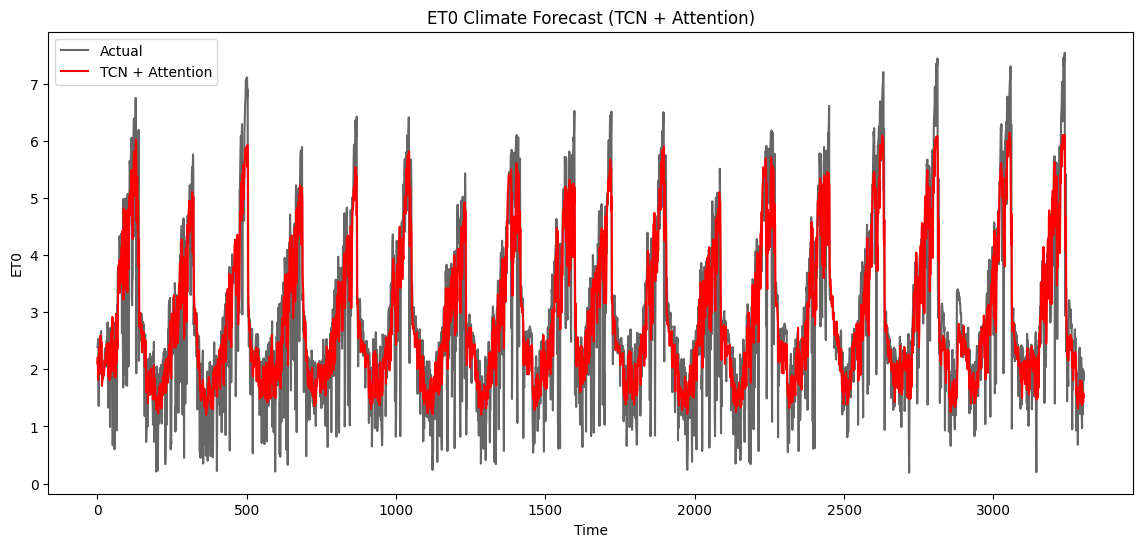

In [10]:
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual', color='black', alpha=0.6)
plt.plot(y_pred, label='TCN + Attention', color='red')
plt.title('ET0 Climate Forecast (TCN + Attention)')
plt.xlabel('Time')
plt.ylabel('ET0')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/st

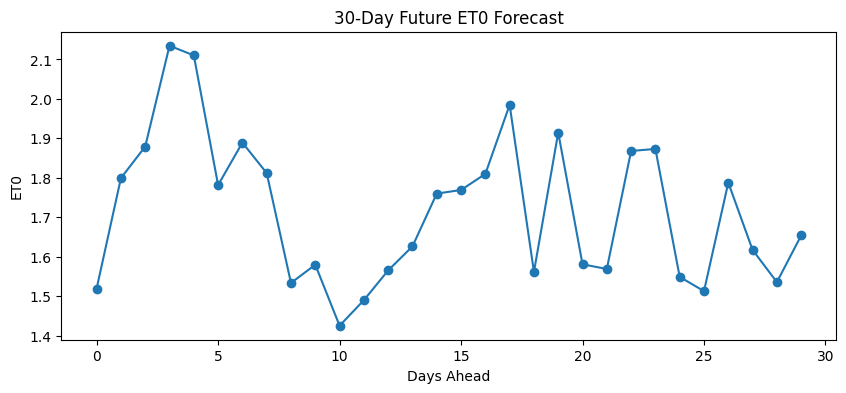

In [11]:
def rolling_forecast(model, last_sequence, steps=30):
    preds = []
    current_seq = last_sequence.copy()

    for _ in range(steps):
        pred = model.predict(current_seq[np.newaxis, ...])[0, 0]
        preds.append(pred)

        current_seq = np.roll(current_seq, -1, axis=0)
        current_seq[-1, -1] = pred  # update target position

    return preds

last_seq = X_test[-1]
future_30_days = rolling_forecast(model, last_seq, 30)

plt.figure(figsize=(10,4))
plt.plot(future_30_days, marker='o')
plt.title("30-Day Future ET0 Forecast")
plt.xlabel("Days Ahead")
plt.ylabel("ET0")
plt.show()


In [16]:
from sklearn.metrics import r2_score

In [17]:
r2 = r2_score(y_test, y_pred)

In [18]:
df['Event'] = 'Normal'

conditions = [
    ((df['temperature_2m_mean_MRI_AGCM3_2_S (°C)'] < 5) &
     (df['relative_humidity_2m_mean_MRI_AGCM3_2_S (%)'] > 80)),

    (df['wind_speed_10m_max_MRI_AGCM3_2_S (km/h)'] > 20),

    (df['rain_sum_MRI_AGCM3_2_S (mm)'] > 10),

    (df['temperature_2m_mean_MRI_AGCM3_2_S (°C)'] > 40),

    ((df['soil_moisture_0_to_10cm_mean_MRI_AGCM3_2_S (m³/m³)'] < 0.10) &
     (df['precipitation_sum_MRI_AGCM3_2_S (mm)'] < 1)),

    (df['precipitation_sum_MRI_AGCM3_2_S (mm)'] > 50)
]

events = ['Smog', 'Windstorm', 'Rain', 'Heatwave', 'Drought', 'Flood']

df['Event'] = np.select(conditions, events, default='Normal')


In [19]:
df.head()

,location_id,temperature_2m_max_MRI_AGCM3_2_S (°C),temperature_2m_mean_MRI_AGCM3_2_S (°C),temperature_2m_min_MRI_AGCM3_2_S (°C),wind_speed_10m_mean_MRI_AGCM3_2_S (km/h),wind_speed_10m_max_MRI_AGCM3_2_S (km/h),cloud_cover_mean_MRI_AGCM3_2_S (%),shortwave_radiation_sum_MRI_AGCM3_2_S (MJ/m²),relative_humidity_2m_mean_MRI_AGCM3_2_S (%),relative_humidity_2m_max_MRI_AGCM3_2_S (%),...,snowfall_sum_EC_Earth3P_HR (cm),pressure_msl_mean_EC_Earth3P_HR (hPa),soil_moisture_0_to_10cm_mean_EC_Earth3P_HR (m³/m³),et0_fao_evapotranspiration_sum_EC_Earth3P_HR (mm),year,month_sin,month_cos,day_sin,day_cos,Event
0,0,11.5,8.1,3.5,4.7,8.5,83,3.04,94,100,...,0.0,1017.1,0.334,0.87,2000.0,0.5,0.866025,0.201299,0.979530,Rain
1,0,8.0,4.9,-0.5,6.4,9.6,80,2.03,100,100,...,0.0,1019.2,0.331,1.84,2000.0,0.5,0.866025,0.394356,0.918958,Smog
2,0,9.6,3.2,-1.5,8.2,10.4,0,12.18,92,100,...,0.0,1018.9,0.328,1.85,2000.0,0.5,0.866025,0.571268,0.820763,Smog
3,0,9.9,3.2,-2.0,10.2,15.3,0,13.29,82,100,...,0.0,1023.3,0.341,0.93,2000.0,0.5,0.866025,0.724793,0.688967,Smog
4,0,12.5,5.6,-0.8,7.3,11.2,37,11.97,72,90,...,0.0,1023.6,0.350,1.69,2000.0,0.5,0.866025,0.848644,0.528964,Normal


In [32]:
import cloudpickle

# Save pipeline using cloudpickle
with open("Climate live & TCN Models.pkl", "wb") as file:
    cloudpickle.dump(model, file)

print("✅ Pipeline saved as 'advanced_ann_pipeline.pkl' using cloudpickle")


✅ Pipeline saved as 'advanced_ann_pipeline.pkl' using cloudpickle
